<a href="https://colab.research.google.com/github/lucghe/lucghe/blob/main/GheorghitaLucian_DataAnalysisTaskCode_05072023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

For this second phase we would like you to perform some simple analyses of network data. Alongside this document you will find some data from a friendship network of high school students.
The edges_list.csv file contains the list of directed friendship ties and the nodes_list.csv file contains information about the nodes’ attributes. You can find all the details in the data_readme.txt file.
**We ask you to keep this data confidential and refrain from using them for other projects, as it is part of an ongoing research project.**

The tasks we ask you to perform are the following:


1.   Compute the degree distribution of the network and plot it.
2.   Compute the pagerank distribution and plot it.
3.   Interpret the results: what do these distributions say about the network?
4.   Perform at least one additional analysis that you think would give you some interesting insight about the dataset.
5.   Summarize your results, conclusions, and potential future works in a PowerPoint presentation, a Jupyter notebook, or other digital support.
6.   Send your presentation and code to us by the deadline given in the e-mail.
7.   We ask you to give a 5 min talk to present your work in an upcoming interview.

# data_readme
Description: A directed network of friendships obtained through a social survey of high school students. The students were asked to nominate other school mates as their friends.

The edges_list.csv file contains the list of directed friendship ties. Students in the column "source" have nominated the students in the column "target" as their friends.

The nodes_list.csv file contains information about the nodes attributes:

Index is the node identifier and coincides with the label appearing in the "source" and "target" columns of the edges_list file.

Sex is coded 1=male, 2=female, 0=unreported.

Race is coded 1=white, 2=black, 3=hispanic, 4=asian, 5=mixed/other, 0=unreported.

Grade is recorded as a number between 7 and 12 with 0=unreported.



Source: https://notebook.community/getsmarter/bda/module_4/M4_NB2_PeerNetworkAnalysis

Documentation references

1.   https://github.com/muneeb706/Graph_Analysis
2.   https://groups.google.com/g/networkx-discuss/c/jB129C8oDuk?pli=1
3.   https://github.com/cds-astro/mocpy/issues/55
4.   https://networkx.org/documentation/networkx-2.3/auto_examples/drawing/plot_degree_histogram.html



In [38]:
# Imports
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [39]:
# Reading network data into directed graph using networkx.
graph = nx.read_edgelist('/content/drive/MyDrive/010_Research/000_02TUWien/PhD_phase_2_task/edges_list.csv', delimiter=',', comments='#', create_using=nx.DiGraph(), nodetype = int)
print(graph)

DiGraph with 1723 nodes and 6774 edges


In [40]:
# Getting outdegree nodes and calculating how many nodes have given out degree value.
out_degrees = dict(graph.out_degree()) # dictionary node:degree
print(out_degrees)
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
print(pos_out_degree_vals)
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
print(uq_pos_out_degree_vals)
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]

{0: 6, 345: 4, 878: 9, 936: 8, 1235: 4, 1649: 1, 1746: 1, 1: 1, 1323: 7, 2: 6, 453: 8, 802: 0, 803: 6, 821: 7, 1196: 0, 1685: 0, 3: 2, 1010: 0, 1428: 10, 4: 4, 224: 7, 704: 8, 1633: 0, 1786: 0, 5: 4, 670: 7, 842: 5, 1044: 2, 1492: 9, 7: 7, 713: 8, 807: 2, 1039: 6, 1095: 3, 1475: 7, 1741: 0, 9: 7, 307: 0, 316: 7, 331: 6, 355: 5, 1130: 3, 1400: 7, 1703: 1, 10: 8, 99: 7, 137: 0, 771: 6, 937: 3, 1012: 7, 1127: 3, 1338: 4, 1763: 4, 11: 3, 610: 9, 1166: 4, 1375: 4, 12: 7, 201: 4, 757: 7, 1064: 0, 1399: 9, 1498: 0, 1645: 0, 1683: 0, 13: 3, 373: 4, 448: 3, 1160: 1, 14: 10, 34: 9, 434: 9, 574: 5, 578: 4, 884: 4, 1112: 7, 1176: 6, 1193: 5, 1531: 7, 1673: 4, 15: 7, 48: 6, 51: 1, 572: 5, 613: 7, 1242: 9, 1547: 1, 1592: 2, 16: 2, 871: 5, 1598: 2, 17: 6, 71: 4, 444: 5, 673: 1, 1083: 2, 1515: 6, 18: 8, 371: 1, 376: 5, 557: 1, 975: 0, 1055: 0, 1257: 0, 1361: 0, 1594: 0, 20: 6, 231: 3, 289: 8, 360: 6, 462: 6, 882: 6, 1374: 4, 21: 4, 1181: 1, 22: 6, 175: 7, 296: 0, 1279: 1, 1363: 0, 1368: 5, 1690: 7, 23

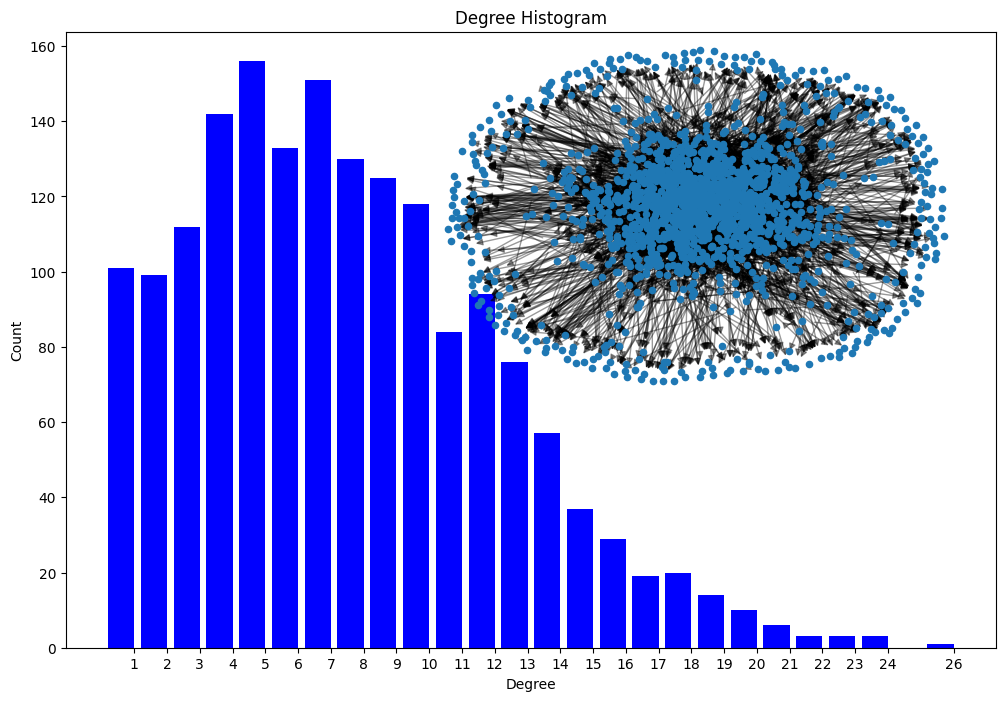

In [41]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

G = graph

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
#Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
G_subgraphs = (G.subgraph(c).copy() for c in nx.strongly_connected_components(G))
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

Source (newer NetworkX documentation):

*   https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html



Degree, average degree, and degree distribution (Ch. 2.3)
https://netsci.hongtaoh.com/degree-average-degree-and-degree-distribution-ch-2-3.html

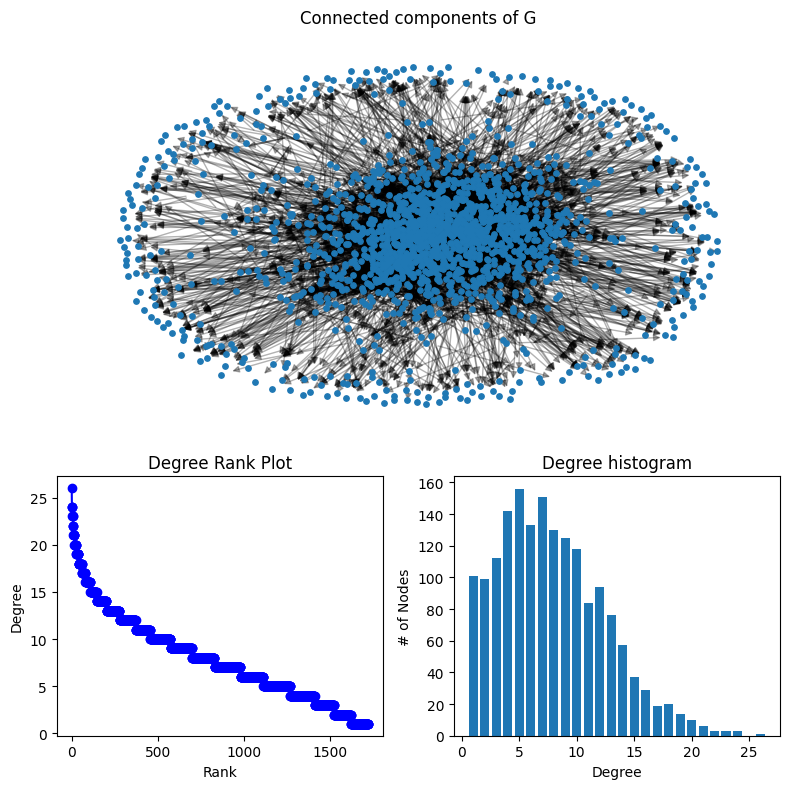

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)
G = wiki_vote_graph
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of the graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
#Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
G_subgraphs = (G.subgraph(c).copy() for c in nx.strongly_connected_components(G))
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=15)
nx.draw_networkx_edges(G, pos, alpha=0.3)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

[26, 24, 24, 24, 23, 23, 23, 22, 22, 22, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

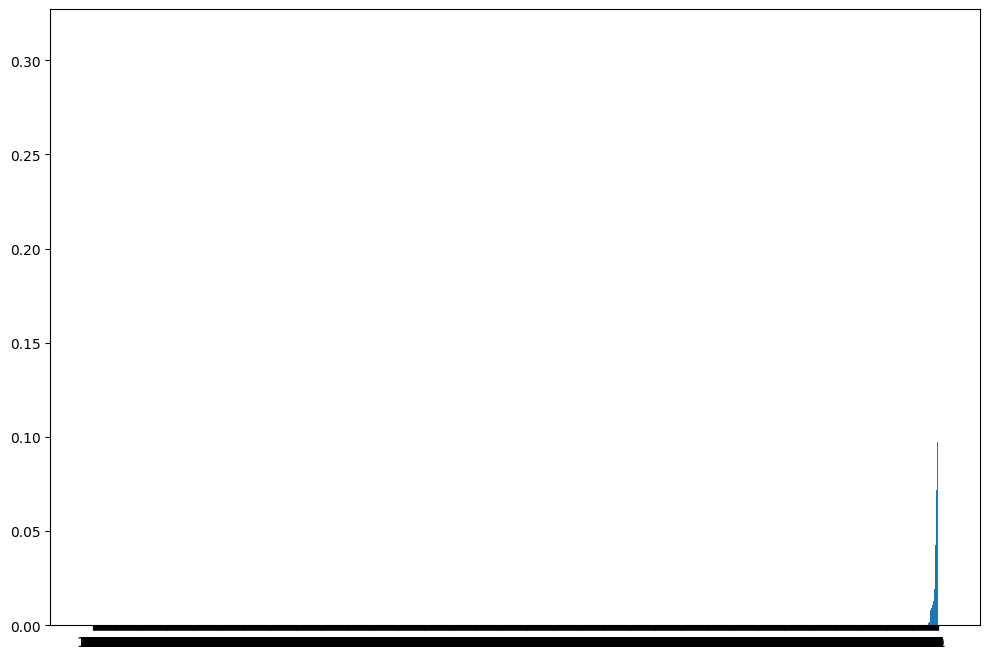

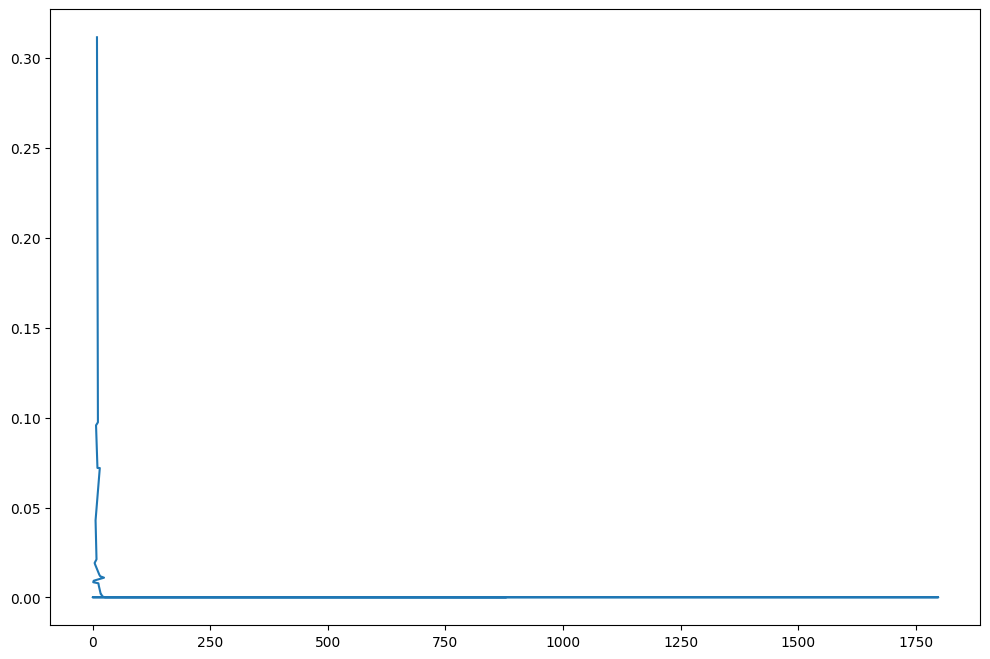

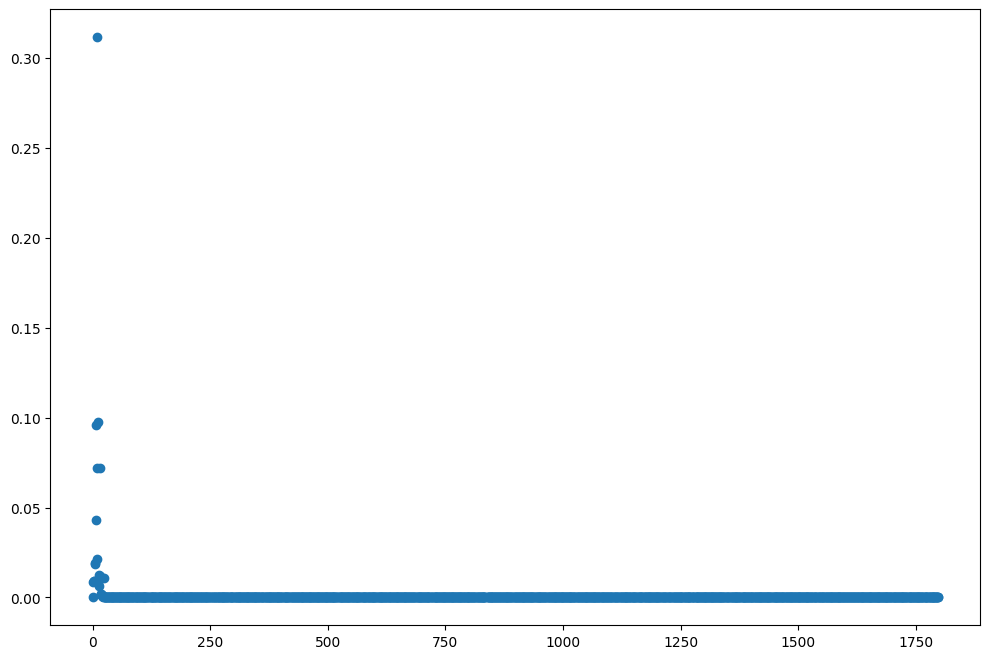

In [43]:
print(degree_sequence)
sorted_G = sorted(G.degree, key=lambda x: x[1], reverse=True)
Gr_pr = nx.DiGraph(sorted_G)
pr_G = nx.pagerank(Gr_pr, alpha=0.85)
print(sorted_G)
print(pr_G)
sorted_pr_G = dict(sorted(pr_G.items(), key=lambda item: item[1]))
print(sorted_pr_G)
import matplotlib.pyplot as plt_sorted_pr_G

names_sorted_pr_G = list(sorted_pr_G.keys())
values_sorted_pr_G = list(sorted_pr_G.values())

plt.bar(range(len(sorted_pr_G)), values_sorted_pr_G, tick_label=names_sorted_pr_G)
plt.show()
# plot
fig, ax = plt.subplots()
ax.plot(names_sorted_pr_G, values_sorted_pr_G)
plt.show()
# plot
fig, ax = plt.subplots()
ax.scatter(names_sorted_pr_G, values_sorted_pr_G)
plt.show()

PageRank documentation
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
Other source
https://kiani.info/mathematicians-relations-and-communities-with-each-other

In [44]:
Gr = nx.DiGraph(G)
pr = nx.pagerank(Gr, alpha=0.85)
print(pr)



{0: 0.0005257541994671129, 345: 0.0004056145403758661, 878: 0.0020786897455602814, 936: 0.0008679448946135435, 1235: 0.0005711561921488796, 1649: 0.0016953865880457383, 1746: 0.001659422672844627, 1: 0.0006282241404003171, 1323: 0.0013175081767390663, 2: 0.0006621554876538641, 453: 0.0008340126892762639, 802: 0.0004719478255216846, 803: 0.0034297695937750773, 821: 0.0004368939569599423, 1196: 0.000284785990894014, 1685: 0.0004982991862793597, 3: 0.000697037213139882, 1010: 0.0009534564760663026, 1428: 0.0011222814690682995, 4: 0.0002959142304499655, 224: 0.0007464846287457044, 704: 0.0006847538442946494, 1633: 0.0014159501521498914, 1786: 0.0007838705137552479, 5: 0.0002799659584596212, 670: 0.0018506025917782026, 842: 0.00033672987430798833, 1044: 0.0011181946324562103, 1492: 0.0007701376451061653, 7: 0.0008806821899220917, 713: 0.0005657428806371158, 807: 0.004997777862527552, 1039: 0.0007882773501301527, 1095: 0.002242802937473868, 1475: 0.0010009493811292563, 1741: 0.00029688045070

In [45]:
pr = nx.pagerank(Gr, alpha=0.85)
print (Gr)

degree_sequence2 = sorted([d for n, d in Gr.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount2 = collections.Counter(degree_sequence2)
print("degree_sequence2: ")
print(degree_sequence2)
print("degreeCount2: ")
print(degreeCount2)

print (pr)
sorted_pagerank = sorted(pr.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_pagerank)

print(converted_dict)

DiGraph with 1723 nodes and 6774 edges
degree_sequence2: 
[26, 24, 24, 24, 23, 23, 23, 22, 22, 22, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1

In [46]:

import networkx as nx
G=Gr
pr2=nx.pagerank(G,0.8)

In [47]:
print(sorted_pagerank)

[(807, 0.004997777862527552), (1703, 0.004109696539316081), (803, 0.0034297695937750773), (1469, 0.0030325412937225256), (1129, 0.0029431696271089215), (980, 0.0029119327849689474), (1476, 0.0027888089518358274), (63, 0.002706046635870923), (1316, 0.0026516912018015237), (1515, 0.0026024312812386414), (1444, 0.002511318352478274), (770, 0.002489463414289513), (71, 0.002445657622456076), (1083, 0.0023301768826672208), (1628, 0.0022633847187045323), (1149, 0.0022518820692096564), (1095, 0.002242802937473868), (1304, 0.002196119348097737), (316, 0.0021923001430095464), (16, 0.0021911694062863646), (1487, 0.002188087567605559), (1619, 0.0021837037021599347), (1216, 0.0021172466545327554), (1614, 0.002094013170947086), (878, 0.0020786897455602814), (1572, 0.002047223713422787), (877, 0.001986585114763808), (1299, 0.0019763863824479723), (873, 0.0019752512347965844), (1245, 0.0019418195931211533), (1400, 0.001940971679205692), (931, 0.001927770300748556), (1739, 0.0019016760672476906), (825,

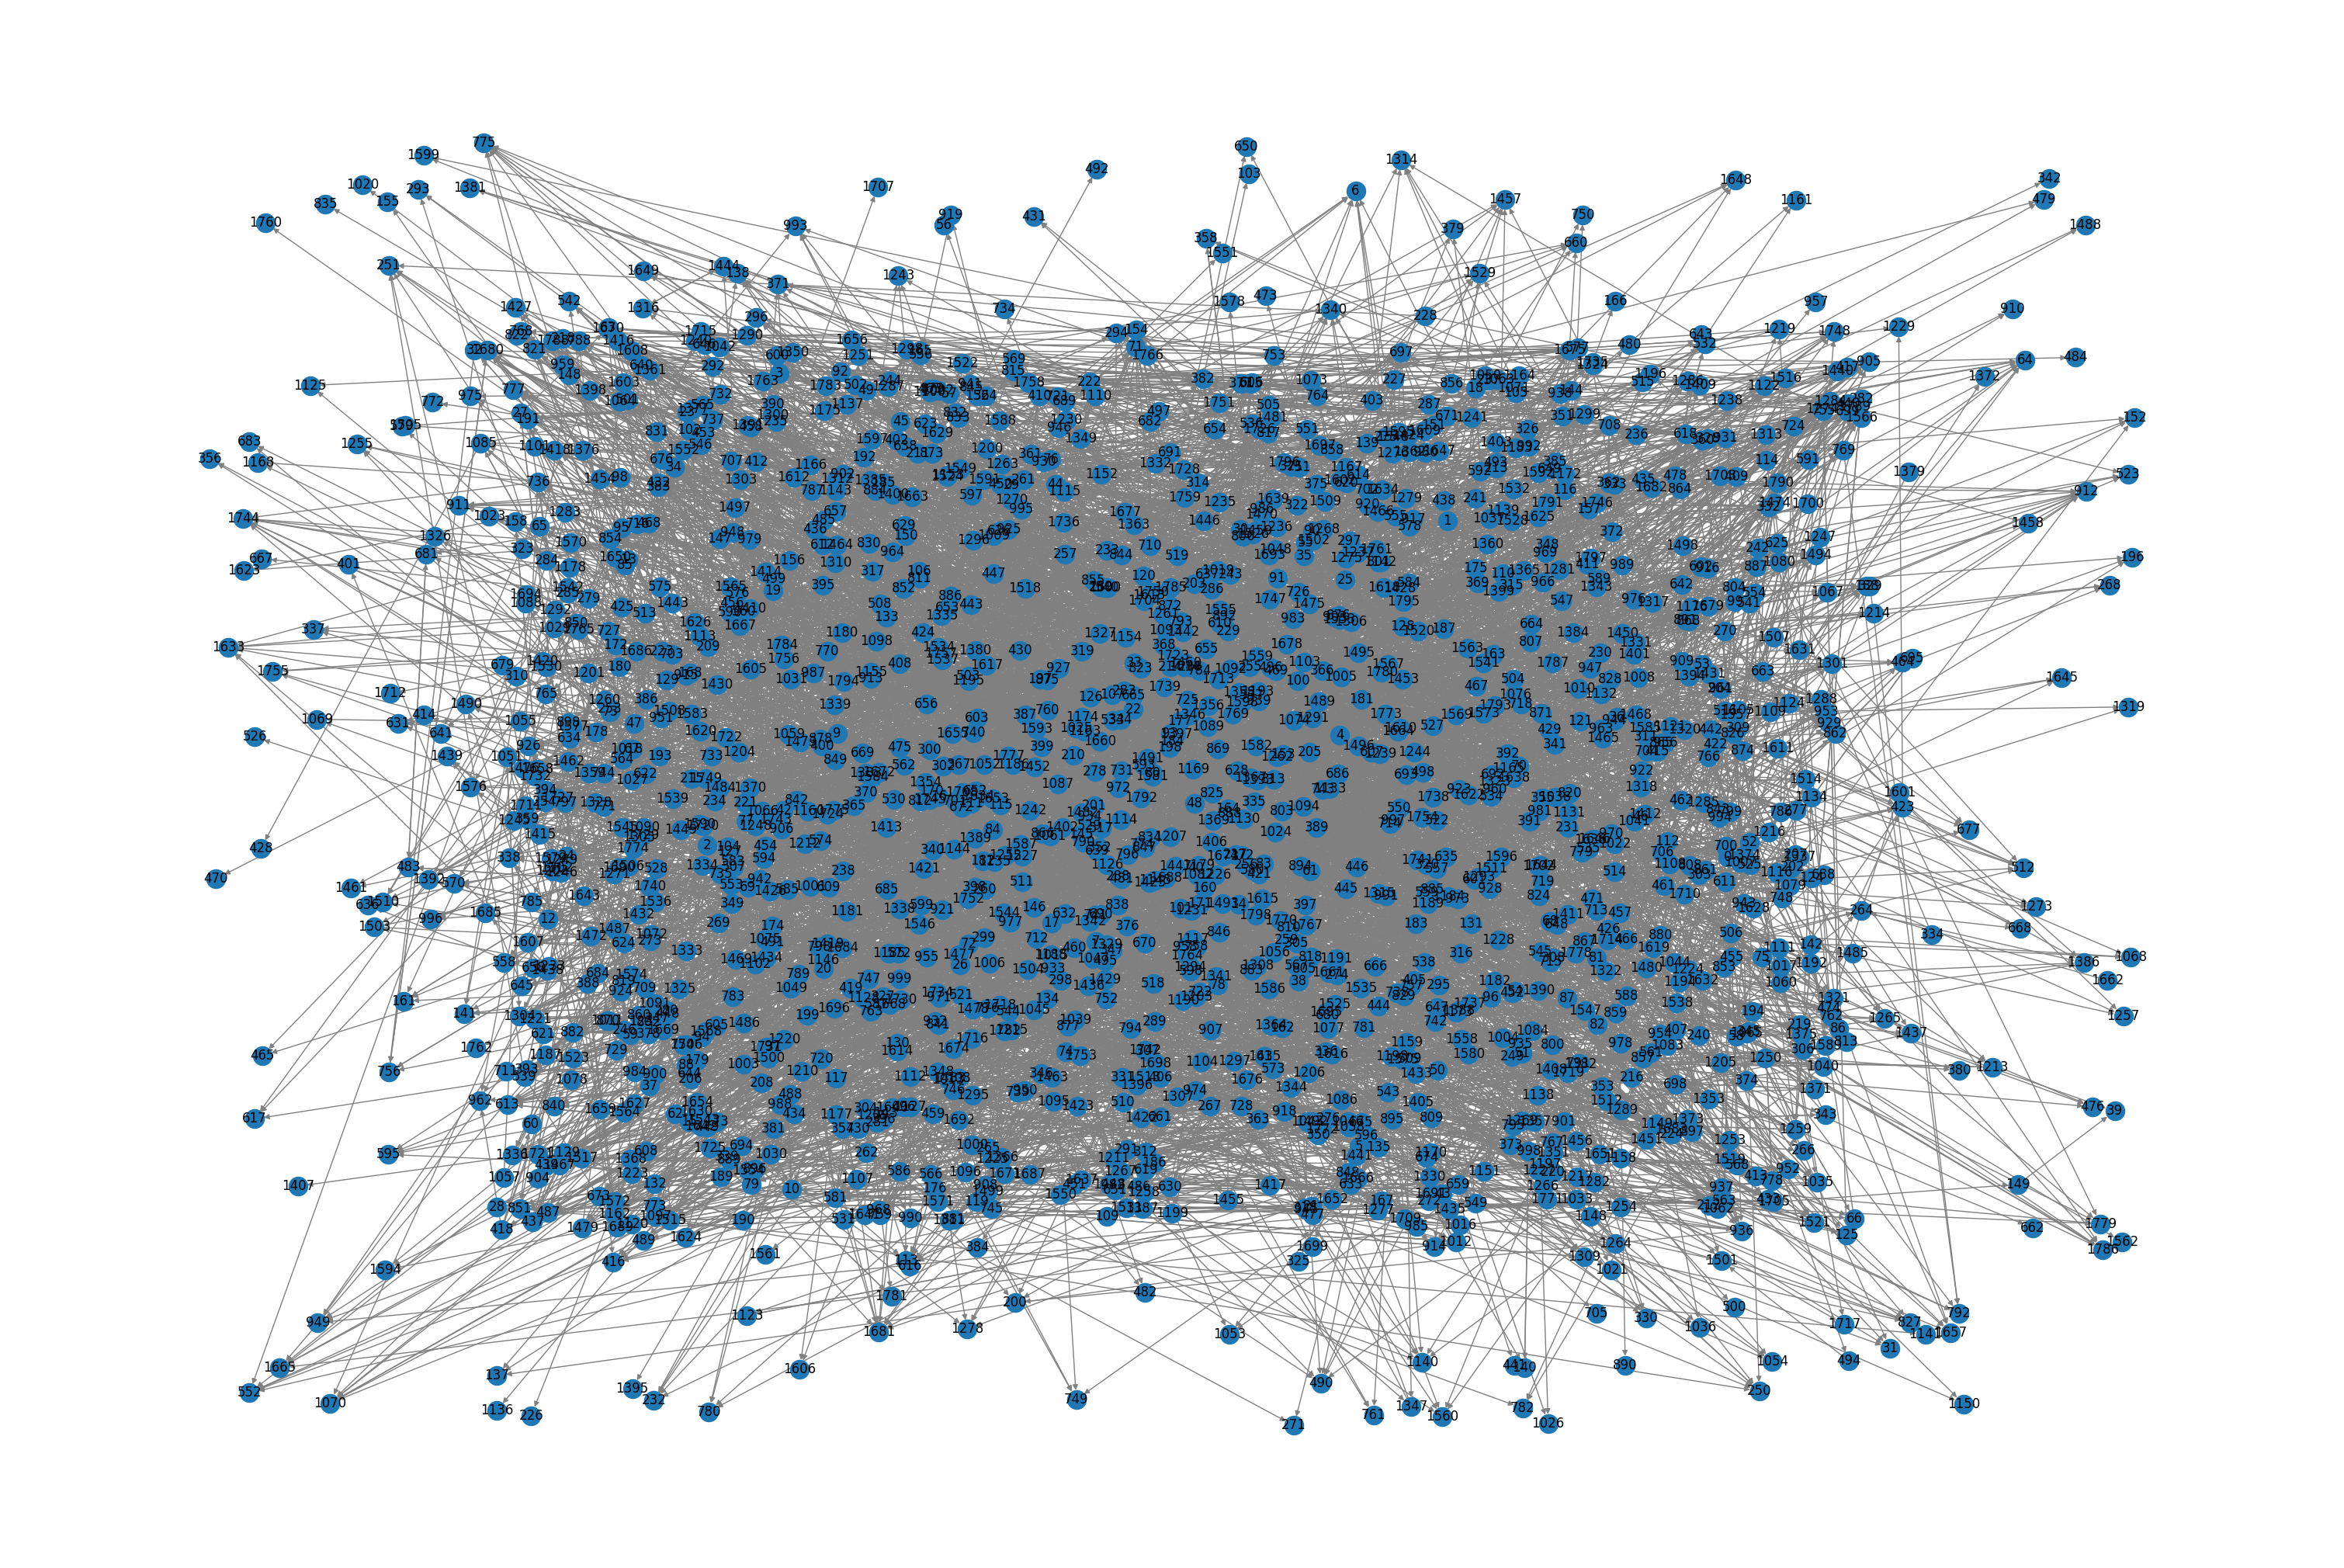

In [48]:
fig = plt.figure(1, figsize=(30, 20), dpi=100)

pos = nx.spring_layout(G, k=1.1*1/np.sqrt(len(G.nodes())), iterations=1)
nx.draw(G, with_labels=True, pos=pos, edge_color='gray')
plt.show()

Queer methodologies references


*   In Queer Methods and Methodologies: Intersecting Queer Theories and Social Science Research, edited by Kath Browne and Catherine J. Nash, 215– 230. Aldershot: Ashgate.
*   Kevin Guyan	Bloomsbury Studies in Digital Cultures
Queer Data: Using Gender, Sex and Sexuality Data for Action





In [49]:
nodes_list = pd.read_csv('/content/drive/MyDrive/010_Research/000_02TUWien/PhD_phase_2_task/nodes_list.csv')
print('Loaded {0} rows of call log.'.format(len(nodes_list)))
nodes_list.head()



Loaded 1799 rows of call log.


# index   sex   race   grade
0        0     2      1      12
1        1     2      2      10
2        2     1      3      10
3        3     2      2       9
4        4     1      2      12

In [50]:
# count values in sex column
# Sex is coded 1=male, 2=female, 0=unreported.
print("males = ", nodes_list[' sex'].value_counts()[1])
print("females = ", nodes_list[' sex'].value_counts()[2])
print("unreported = ", nodes_list[' sex'].value_counts()[0])

# count values in race column
# Race is coded 1=white, 2=black, 3=hispanic, 4=asian, 5=mixed/other, 0=unreported.
print("white = ", nodes_list[' race'].value_counts()[1])
print("black = ", nodes_list[' race'].value_counts()[2])
print("hispanic = ", nodes_list[' race'].value_counts()[3])
print("asian = ", nodes_list[' race'].value_counts()[4])
print("mixed/other = ", nodes_list[' race'].value_counts()[5])
print("unreported = ", nodes_list[' race'].value_counts()[0])

# Count values in grade column
# Grade is recorded as a number between 7 and 12 with 0=unreported.
print("Grade 7 = ", nodes_list[' grade'].value_counts()[7])
print("Grade 8 = ", nodes_list[' grade'].value_counts()[8])
print("Grade 9 = ", nodes_list[' grade'].value_counts()[9])
print("Grade 10 = ", nodes_list[' grade'].value_counts()[10])
print("Grade 11 = ", nodes_list[' grade'].value_counts()[11])
print("Grade 12 = ", nodes_list[' grade'].value_counts()[12])
print("Grade 0 = ", nodes_list[' grade'].value_counts()[0])



males =  726
females =  1061
unreported =  12
white =  235
black =  847
hispanic =  277
asian =  254
mixed/other =  178
unreported =  8
Grade 7 =  101
Grade 8 =  60
Grade 9 =  448
Grade 10 =  438
Grade 11 =  371
Grade 12 =  372
Grade 0 =  8


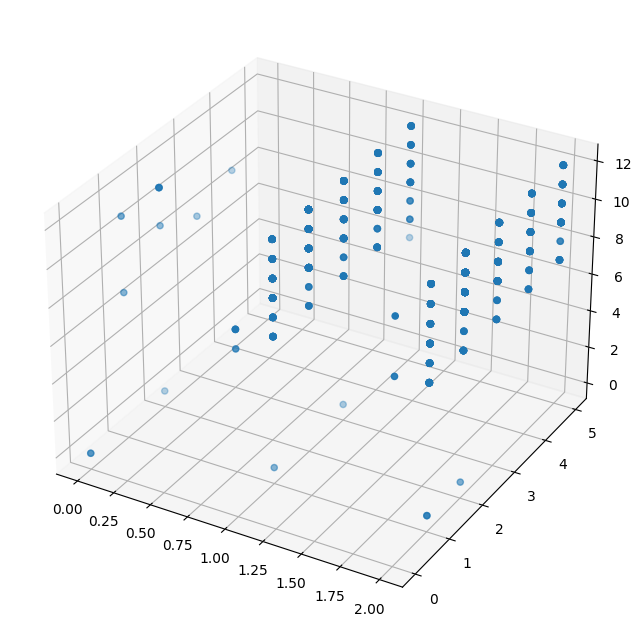

In [51]:
# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(nodes_list[' sex'], nodes_list[' race'], nodes_list[' grade'])
plt.show()

In [52]:
type(nodes_list)

pandas.core.frame.DataFrame

In [53]:
# First 10, Last 10
import itertools
n = 10
from enum import Enum
# Sex is coded 1=male, 2=female, 0=unreported.
class Sex(Enum):
      male = 1
      female = 2
      unreported = 0

# Race is coded 1=white, 2=black, 3=hispanic, 4=asian, 5=mixed/other, 0=unreported.
class Race(Enum):
      white = 1
      black = 2
      hispanic = 3
      asian = 4
      mixedother = 5
      unreported = 0


print("First 10 - degree")
for item in itertools.islice(sorted_G, n):
    print(nodes_list.loc[nodes_list['# index'] == item[0]])

print("First 10 - pagerank")
for item in itertools.islice(sorted_pr_G, n):
    print(nodes_list.loc[nodes_list['# index'] == item])

First 10 - degree
     # index   sex   race   grade
878      878     1      2      12
    # index   sex   race   grade
14       14     1      3      10
     # index   sex   race   grade
770      770     1      5      12
     # index   sex   race   grade
857      857     1      4      10
      # index   sex   race   grade
1476     1476     1      2      11
     # index   sex   race   grade
873      873     1      2      11
     # index   sex   race   grade
825      825     1      3      12
      # index   sex   race   grade
1428     1428     2      2       9
     # index   sex   race   grade
931      931     1      3      12
     # index   sex   race   grade
581      581     1      3      11
First 10 - pagerank
     # index   sex   race   grade
878      878     1      2      12
     # index   sex   race   grade
770      770     1      5      12
     # index   sex   race   grade
857      857     1      4      10
      # index   sex   race   grade
1476     1476     1      2      11
     #